## Describing Distributions (Core)
- Brian Lafferty
- 8.2.22

### Libraries

In [15]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Loading Data

In [2]:
# copy link address
url = 'https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data'

# reading data with pandas
df = pd.read_csv(url)

df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


### Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               995 non-null    object 
 1   Lat                 1000 non-null   float64
 2   Lng                 1000 non-null   float64
 3   Area                995 non-null    object 
 4   Children            993 non-null    float64
 5   Age                 1000 non-null   int64  
 6   Income              1000 non-null   float64
 7   Marital             995 non-null    object 
 8   Gender              995 non-null    object 
 9   ReAdmis             1000 non-null   int64  
 10  VitD_levels         1000 non-null   float64
 11  Doc_visits          1000 non-null   int64  
 12  Full_meals_eaten    1000 non-null   int64  
 13  vitD_supp           1000 non-null   int64  
 14  Soft_drink          1000 non-null   int64  
 15  Initial_admin       995 non-null    object 
 16  HighBlo

In [4]:
# checking for duplicates
df.duplicated().sum()

0

### Analyzing VitD_levels, Doc_visits, and TotalCharge

#### VitD_levels



The VitD_levels has a kurtosis value of 3.013147515833447.

The first 3 values of VitD_levels are: 
0    19.141466
1    18.940352
2    18.057507
Name: VitD_levels, dtype: float64


The Doc_visits has a kurtosis value of 2.9919958083381206.

The first 3 values of Doc_visits are: 
0    6
1    4
2    4
Name: Doc_visits, dtype: int64


The TotalCharge has a kurtosis value of 3.2650077463439384.

The first 3 values of TotalCharge are: 
0    3726.702860
1    4193.190458
2    2434.234222
Name: TotalCharge, dtype: float64


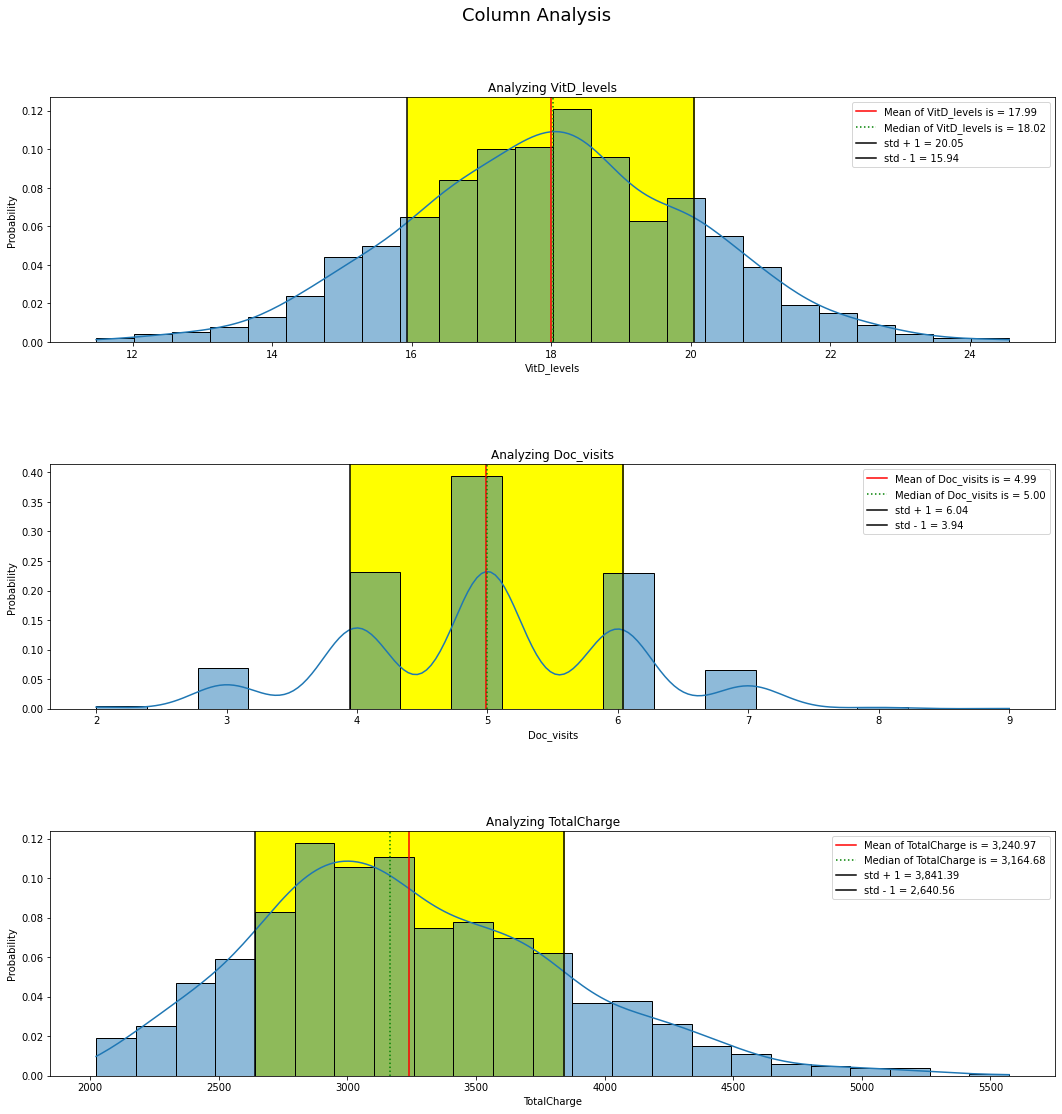

In [39]:
# I adapted code from the following article https://engineeringfordatascience.com/posts/matplotlib_subplots/

# creating a list of columns
columns = ['VitD_levels', 'Doc_visits', 'TotalCharge']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (18, 18))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Column Analysis", fontsize=18, y=0.95)

# creating loop to preform column analysis
for column, ax in zip(columns, ax.ravel()):
    # creating variables
    feature = df[column]

    # creating mean, std, median, and std +- 1
    mean = feature.mean()
    std = feature.std()
    median = feature.median()
    std_plus_one = mean + std
    std_minus_one = mean - std

    # plotting the column information
    sns.histplot(feature, ax = ax, stat = 'probability', kde = True)
    ax.axvline(mean, color = 'red', label = f'Mean of {column} is = {mean:,.2f}')
    ax.axvline(median, ls = ':', color = 'green', label = f'Median of {column} is = {median:,.2f}')
    ax.axvline(std_plus_one, color = 'black', label = f'std + 1 = {std_plus_one:,.2f}')
    ax.axvline(std_minus_one, color = 'black', label = f'std - 1 = {std_minus_one:,.2f}')
    ax.axvspan(std_plus_one, std_minus_one, color = 'yellow', zorder = 0)
    ax.set_title(f'Analyzing {column}')
    ax.legend();

    # columns kurtosis measurement
    kurt = stats.kurtosis(feature, fisher = False)

    print(f'\n\nThe {column} has a kurtosis value of {kurt}.')

    # printing column data to determine if column is discrete or continuous
    print(f'\nThe first 3 values of {column} are: \n{feature.loc[:2]}')

#### Conclusion for VitD_levels column

- Continuous values
- There is no skew
- Displays Mesokurtic kurtosis

#### Conclusion for Doc_visits column

- Discrete values
- There is no skew
- Displays Mesokurtic kurtosis

#### Conclusion for TotalCharge column

- Continuous values
- There is slight positive skew
- Displays Leptokurtic kurtosis